In [27]:
import numpy as np
import matplotlib.pyplot as plt

In [28]:
# here are the parameters
alpha = 1.5 * np.pi
beta = 2.5 * np.pi
N = 50  # Number of grid points in each direction
h = 2.0 / (N - 1)  # Grid spacing cuz thee domain is [-1,1] × [-1,1]

In [29]:
x = np.linspace(-1, 1, N)
y = np.linspace(-1, 1, N)
X, Y = np.meshgrid(x, y)

In [30]:
def analytical_solution(x, y):
    return np.sin(alpha * x) * np.sin(beta * y)
# this is the solution 

In [31]:
f_analytical = analytical_solution(X, Y) # analytical sol is done heree
# now lets move on calculting numerical one

f_numerical = np.zeros((N, N))

# boundary conditions
f_numerical[0, :] = analytical_solution(x, -1)
f_numerical[-1, :] = analytical_solution(x, 1)
f_numerical[:, 0] = analytical_solution(-1, y)
f_numerical[:, -1] = analytical_solution(1, y)

In [32]:
max_iter = 1000
tolerance = 1e-6
error = 1.0

for iteration in range(max_iter):
    f_old = f_numerical.copy()

    # here i update interior points
    for i in range(1, N - 1):
        for j in range(1, N - 1):
            # just the previouss finite difference formula rearranged
            f_numerical[i, j] = (f_numerical[i + 1, j] + f_numerical[i - 1, j] +
                                 f_numerical[i, j + 1] + f_numerical[i, j - 1]) / (
                                            4 + h ** 2 * (alpha ** 2 + beta ** 2))

    # I guess its not needed but check the convergence
    error = np.max(np.abs(f_numerical - f_old))
    if error < tolerance:
        break

In [33]:
# just for curiositu calculate the error between analytical and numerical solutions

absolute_error = np.abs(f_analytical - f_numerical)
max_error = np.max(absolute_error)
avg_error = np.mean(absolute_error)

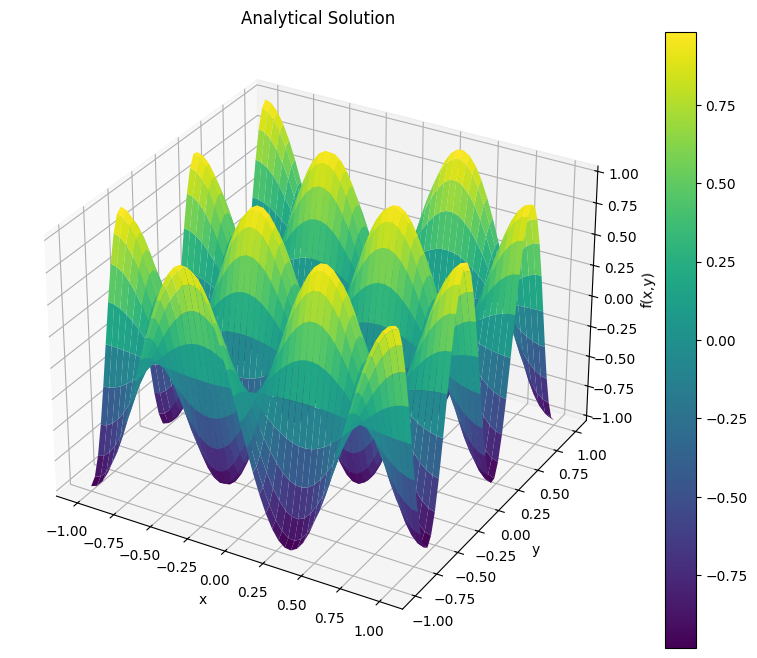

In [34]:
fig1 = plt.figure(figsize=(10, 8))
ax1 = fig1.add_subplot(111, projection='3d')
surf1 = ax1.plot_surface(X, Y, f_analytical, cmap='viridis')
ax1.set_title('Analytical Solution')
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.set_zlabel('f(x,y)')
plt.colorbar(surf1, ax=ax1)
plt.show()

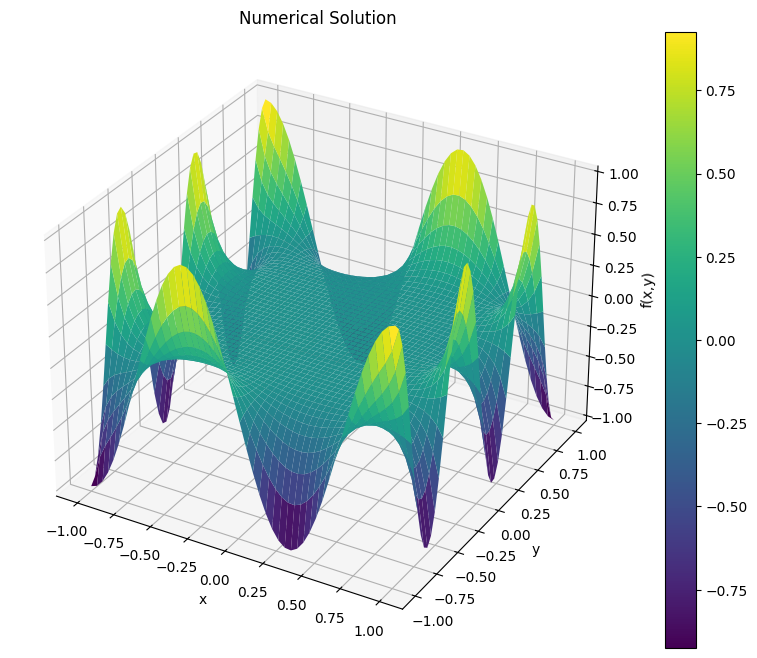

In [35]:
fig2 = plt.figure(figsize=(10, 8))
ax2 = fig2.add_subplot(111, projection='3d')
surf2 = ax2.plot_surface(X, Y, f_numerical, cmap='viridis')
ax2.set_title('Numerical Solution')
ax2.set_xlabel('x')
ax2.set_ylabel('y')
ax2.set_zlabel('f(x,y)')
plt.colorbar(surf2, ax=ax2)
plt.show()

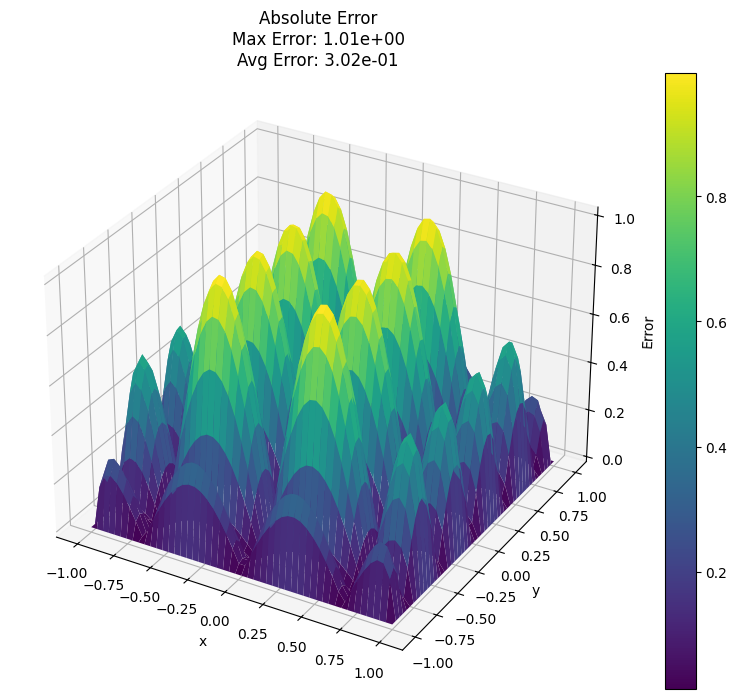

In [36]:
fig3 = plt.figure(figsize=(10, 8))
ax3 = fig3.add_subplot(111, projection='3d')
surf3 = ax3.plot_surface(X, Y, absolute_error, cmap='viridis')
ax3.set_title(f'Absolute Error\nMax Error: {max_error:.2e}\nAvg Error: {avg_error:.2e}')
ax3.set_xlabel('x')
ax3.set_ylabel('y')
ax3.set_zlabel('Error')
plt.colorbar(surf3, ax=ax3)
plt.show()

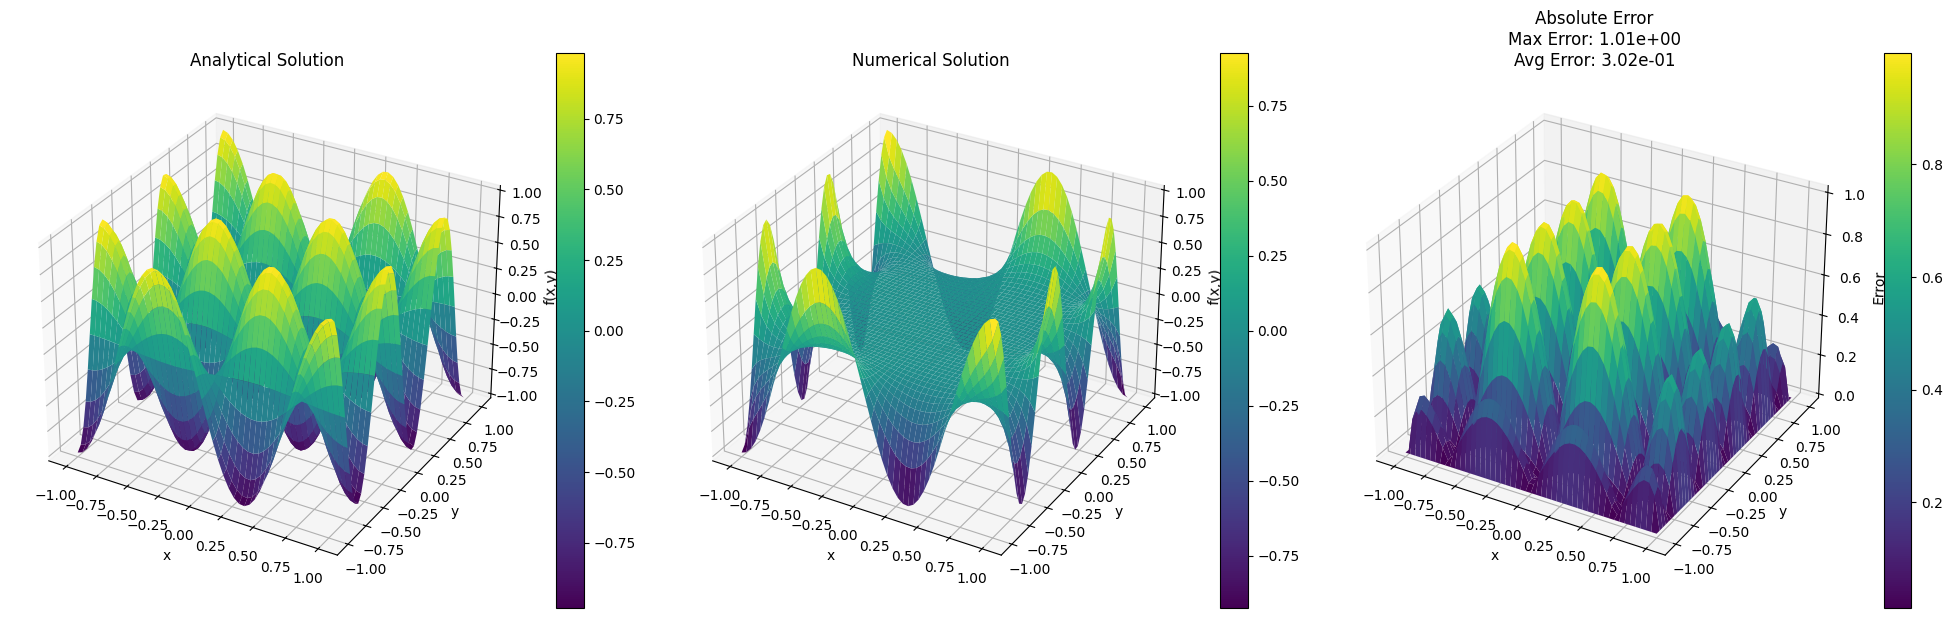

In [37]:
fig = plt.figure(figsize=(20, 6))

ax1 = fig.add_subplot(131, projection='3d')
surf1 = ax1.plot_surface(X, Y, f_analytical, cmap='viridis')
ax1.set_title('Analytical Solution')
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.set_zlabel('f(x,y)')
fig.colorbar(surf1, ax=ax1)

ax2 = fig.add_subplot(132, projection='3d')
surf2 = ax2.plot_surface(X, Y, f_numerical, cmap='viridis')
ax2.set_title('Numerical Solution')
ax2.set_xlabel('x')
ax2.set_ylabel('y')
ax2.set_zlabel('f(x,y)')
fig.colorbar(surf2, ax=ax2)

ax3 = fig.add_subplot(133, projection='3d')
surf3 = ax3.plot_surface(X, Y, absolute_error, cmap='viridis')
ax3.set_title(f'Absolute Error\nMax Error: {max_error:.2e}\nAvg Error: {avg_error:.2e}')
ax3.set_xlabel('x')
ax3.set_ylabel('y')
ax3.set_zlabel('Error')
fig.colorbar(surf3, ax=ax3)

plt.tight_layout()
plt.show()